In [6]:
import pickle

In [12]:
with open("matt.pkl", 'rb') as picklefile: 
    corpus = pickle.load(picklefile)

In [13]:
index=0
for tweet in corpus:
    corpus[index] = corpus[index].replace('amp','and')
    corpus[index] = corpus[index].replace('https','')
    corpus[index] = corpus[index].replace('nan','')
    corpus[index] = corpus[index].replace('RT','')
    corpus[index] = corpus[index].replace('POTU','POTUS')
    corpus[index] = corpus[index].replace('Fox New','Fox News')
    corpus[index] = corpus[index].replace('htt','')    

    index+=1

In [14]:
with open('matt.pkl', 'wb') as picklefile:
    pickle.dump(corpus, picklefile)

thefile = open('matt.txt', 'w')

for tweet in corpus:
  thefile.write("%s\n" % tweet)

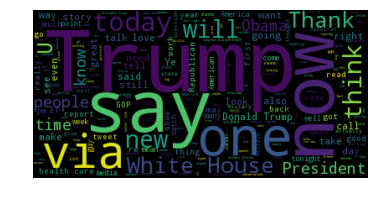

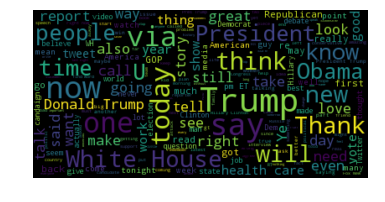

In [27]:
#!/usr/bin/env python
"""
Minimal Example
===============
Generating a square wordcloud from corpus using default arguments.
"""

from os import path
from wordcloud import WordCloud

# Read the whole text.
text = open(path.join('corpus.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

In [2]:
#!/usr/bin/env python
"""
Using custom colors
===================
Using the recolor method and custom coloring functions.
"""

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

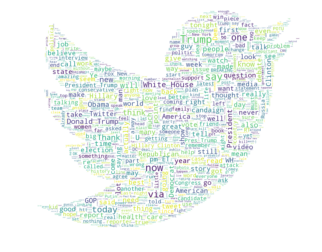

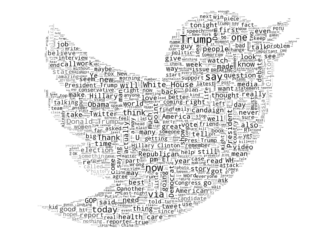

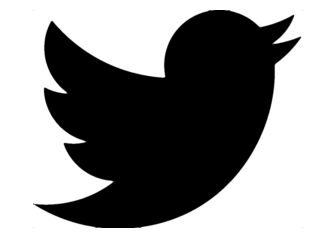

In [7]:
# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open("twitter_mask.png"))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open("corpus.txt").read()


alice_coloring = np.array(Image.open("twitter_mask.png"))
# stopwords = set(STOPWORDS)
# stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#!/usr/bin/env python
"""
Image-colored wordcloud
=======================
You can color a word-cloud by using an image-based coloring strategy
implemented in ImageColorGenerator. It uses the average color of the region
occupied by the word in a source image. You can combine this with masking -
pure-white will be interpreted as 'don't occupy' by the WordCloud object when
passed as mask.
If you want white as a legal color, you can just pass a different image to
"mask", but make sure the image shapes line up.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

d = path.dirname(__file__)

# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d, "twitter_mask.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

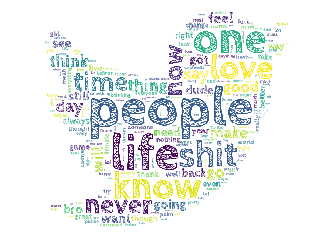

In [15]:
from scipy.misc import imread
text = open("matt.txt").read()
twitter_mask = np.array(Image.open("twitter_mask.png"))


wordcloud = WordCloud(
                      font_path='CabinSketch-Bold.ttf',
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
            ).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./matt_twitter_wordcloud.png', dpi=300)
plt.show()